# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [1]:
# only library allowed do not modify
from src.sql import execute_query

In [2]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [3]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,5663,6254,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,test
1,1,12784,7766,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,test
2,2,3859,7150,None,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,test
3,3,6815,9068,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,test
4,4,1381,8708,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,test
...,...,...,...,...,...,...,...,...
3793,3793,7916,11906,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,test
3794,3794,14679,3726,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,test
3795,3795,6342,3112,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,test
3796,3796,13676,1776,None,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,test


## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [10]:
# write query inside docstring
query_1 = """
        SELECT "Location", 
        count("Location") as cnt_twit
        FROM train_table
        group by "location" 
        order by "cnt_twit" desc
        limit 10
"""

In [11]:
result_1 = execute_query(query_1)

In [12]:
result_1

,Location,cnt_twit
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


## Question 2: Intermediate SQL


In [49]:
# write query inside docstring
query_2 = """
  SELECT UserName,
        sum(case when Sentiment = 'Positive' then 1 else 0 end) "pos_count",
        sum(case when Sentiment = 'Negative' then 1 else 0 end) "neg_count",
        sum(case when Sentiment = 'Extremely Positive' then 1 else 0 end) "extremely_pos_count",
        sum(case when Sentiment = 'Extremely Negative' then 1 else 0 end) "extremely_neg_count"
        FROM train_table
        group by UserName
        order by UserName desc
"""

In [50]:
result_2 = execute_query(query_2)

In [51]:
result_2

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,14983,0,0,0,1
1,14981,2,0,0,0
2,14980,2,0,0,0
3,14979,1,0,2,0
4,14978,0,0,0,1
...,...,...,...,...,...
13994,4,1,0,1,0
13995,3,1,0,0,1
13996,2,0,1,0,0
13997,1,2,0,2,0


## Question 3: Medium SQL

In [110]:
# write query inside docstring
query_3 = """
        
      WITH dt_temp as (
          SELECT TweetAt,UserName,
        sum(case when Sentiment = 'Positive' then 1 else 0 end) "pos_count",
        sum(case when Sentiment = 'Negative' then 1 else 0 end) "neg_count",
        sum(case when Sentiment = 'Extremely Positive' then 1 else 0 end) "extremely_pos_count",
        sum(case when Sentiment = 'Extremely Negative' then 1 else 0 end) "extremely_neg_count"
        FROM train_table
        group by UserName,TweetAt
       )
        
       SELECT TweetAt, 
       (pos_count + (extremely_pos_count*1.00))/((neg_count + extremely_neg_count)+(pos_count + extremely_pos_count)) pos_rate
       FROM dt_temp 
       
"""

In [111]:
result_3 = execute_query(query_3)

In [112]:
result_3

,TweetAt,pos_rate
0,02-04-2020,1.0
1,10-04-2020,NaN
2,16-03-2020,NaN
3,02-04-2020,1.0
4,13-04-2020,1.0
...,...,...
38553,11-04-2020,1.0
38554,25-03-2020,1.0
38555,01-04-2020,1.0
38556,03-04-2020,1.0


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [123]:
import pandas as pd
def plot(df : pd.DataFrame):
    df.TweetAt = pd.to_datetime(df.TweetAt)
    df_g = df.groupby(['TweetAt'])['pos_rate'].mean()
    df_g.plot(kind='line', title='Sentiment Score', ylabel='Mean Sentiment Score', xlabel='Day', figsize=(5, 3))

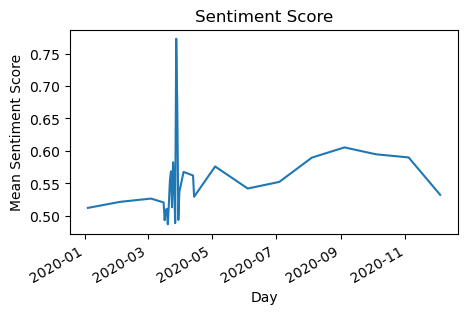

In [124]:
plot(result_3)

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5